## kNN for Missing Values Imputation

`nearest neighbor imputation`: usage of kNN to replace missing values in columns

##### Configuration of kNN:
- distance measure (e.g. Euclidean)
- number of contributing neighbors

#### Example Dataset
- <a href='https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'> Horse Colic Dataset</a>
- <a href='https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.names'> Horse Colic Dataset Description</a> 

In [25]:
# input
import pandas as pd 
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

In [2]:
# load data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
df = pd.read_csv(url, header=None, na_values='?')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
0     299 non-null float64
1     300 non-null int64
2     300 non-null int64
3     240 non-null float64
4     276 non-null float64
5     242 non-null float64
6     244 non-null float64
7     231 non-null float64
8     253 non-null float64
9     268 non-null float64
10    245 non-null float64
11    256 non-null float64
12    244 non-null float64
13    196 non-null float64
14    194 non-null float64
15    53 non-null float64
16    198 non-null float64
17    182 non-null float64
18    271 non-null float64
19    267 non-null float64
20    135 non-null float64
21    102 non-null float64
22    299 non-null float64
23    300 non-null int64
24    300 non-null int64
25    300 non-null int64
26    300 non-null int64
27    300 non-null int64
dtypes: float64(21), int64(7)
memory usage: 65.8 KB


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [5]:
for i in range(df.shape[1]):
    n_miss = df[[i]].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


### Nearest Neighbor Imputation with KNNImputer
>Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [29]:
# split date into input and output
data = df.values
X = data[:, :-1]
y = data[:, -1]

In [8]:
#define imputer
imputer = KNNImputer()

In [9]:
# fit and transform dataset
X_trans = imputer.fit_transform(X)

In [11]:
# check
print('Missing: %d' % sum(np.isnan(X_trans).flatten()))

Missing: 0


### KNNImputer and Model Evaluation
> To correctly apply KNN for missing data imputation and aviod data leakage, it is required that the models are calculated for each column  in the training set only, then applied to the train and test sets for each fold in the dataset

Use a pipeline to implement KNNImpuation with k-fold cross validation:
1. KNN Imputation
2. Model

In [14]:
# Pipeline
imputer = KNNImputer()
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

In [16]:
# define model evaluation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [18]:
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv,
                        n_jobs=-2, error_score='raise')

In [21]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.791 (0.070)


### KNNImputer and Different Number of Neighbors
test different values for its main hyperparameter `k`

In [30]:
results=[]
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
    # create pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), 
                               ('m', RandomForestClassifier())])
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv,
                        n_jobs=-2, error_score='raise')
    # append scores
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

>1 0.687 (0.068)
>3 0.723 (0.073)
>5 0.777 (0.075)
>7 0.789 (0.060)
>9 0.789 (0.063)
>15 0.801 (0.072)
>18 0.809 (0.064)
>21 0.829 (0.073)


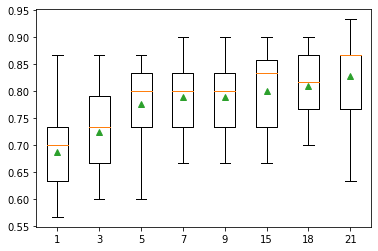

In [32]:
# plot results
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

### KNNImputer Transform When Making a Prediction
with the information about the best number of neighbors, lets predict the class of a new row with missing values.

In [34]:
# create a new row
n_row = [2,1,530101,38.50,66,28,3,3,np.nan,2,5,4,4,np.nan,np.nan,np.nan,3,5,45.00,8.40,np.nan,np.nan,2,2,11300,0,0]

In [35]:
# split the data
data = df.values
X = data[:, :-1]
y = data[:, -1]

In [37]:
# creat a pipeline
pipeline = Pipeline([('i', KNNImputer(n_neighbors=21)), 
                     ('m', RandomForestClassifier())])

In [38]:
# fit pipeline
pipeline.fit(X, y)

Pipeline(steps=[('i', KNNImputer(n_neighbors=21)),
                ('m', RandomForestClassifier())])

In [41]:
yhat = pipeline.predict([n_row])

In [43]:
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


## Resources
- https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/